![example](images/1_DywgVk0WQX66Io_boucHwA.jpeg)

# Factors that determine a successful film

**Authors:** Warren Morelli


## Overview

In this project, I analysed a wide range of film databases from various sources (Bom, IMDb, etc), to come up with an understanding of what factors make a film successful and I have translated that into an actionable plan to help the decision-makers at Microsoft decide what type of film to create. 

After analysing the data, I have come to the conclusion that the 4 main factors that determine whether a movie is successful are: genre, release month, film runtime and production budget. 

Here are a couple of main points from my findings below:

Musical and fantasy are the genres that produces the highest profit, followed by action, adventure and animation. 
Films released in May-July and November are more successful, this is related to the most popular holidays in the US. 
Films with a runtime of 100 - 140 minutes are the most profitable.
There is a strong correlation between film with higher production budget and films that produce higher revenue.

## Business Problem

Microsoft wants to get the most out of their investment in the movie industry. In order for them to achieve this, I have been tasked with determining what type of films they should create. The following questions were addressed:

1- What are the most crucial factors that determine whether a movie is most profitable?

2- Is there enough data to be able to anaylise these factors?

3- What are the most successful genres?

4- What is the ideal runtime for a profitable film?

5- Which months are films the most successful?

6- Does a higher production budget equal higher revenue?


## Data 
The films revenues came from tn.movie_budgets.csv.gz & zippedData/bom.movie_gross.csv.gz. This was connected to imdb.title.basics.csv.gz and tmdb.movies.csv.gz to compare the revenue and profits with the runtimes, release dates, genres and production budget, as I found these to be the most crucial factors for a succesful film.


***

<font color=blue>Import my data</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

df1 = pd.read_csv("zippedData/bom.movie_gross.csv.gz") #gross
df2 = pd.read_csv("zippedData/imdb.title.basics.csv.gz") #run_minutes & genre
df3 = pd.read_csv("zippedData/tmdb.movies.csv.gz") #language
df4 = pd.read_csv("zippedData/tn.movie_budgets.csv.gz") #Bonus production_budget expectation

I first started by droping all of the variables that wouldn’t help me determain which films are successful.

There was some data missing in the datasets. Luckily, I had a very large data base so I could afford to remove those rows while keeping the large majority of my data for an accurate analysis.

I took the total revenue and minused the production cost to find the total profit so I could find which months, genres and runtimes where most profitable. I also compared the production cost to total revenue to see if there was any corrolation.

There were quite a few missing runtime data values, too many to delete, so I found if I changed those missing values to the median, it didn’t effect the outcome and I wouldn’t lose data.

***

## Data Cleaning
First thing I had to do was clean the 4 data sets before I could do any analysis.

<font color=blue>DF1 Data Cleaning</font>

In [2]:
#First I drop columns I don't need
df1.drop('studio', inplace=True, axis=1)
df1.drop('year', inplace=True, axis=1)

#Some films didn't make revenue internationally so the foreign gross values were listed as NaN so I had to change them to 0
df1['foreign_gross'] = df1['foreign_gross'].fillna('0')

# I will delete Null rows for domestic_gross because there aren't that many so I won't lose much data.
df1 = df1.dropna(subset=['domestic_gross'])

#In forign goss, the values were strings so it had to be changed to int. Some values had commas so I had to remove them before I could convert it.
df1['foreign_gross'] = df1['foreign_gross'].str.replace(",","")
df1[df1['foreign_gross'].str.contains(',')] #double check to make sure it worked

#change foreign_gross to float, then int
df1['foreign_gross'] = df1['foreign_gross'].astype('float')
df1['domestic_gross'] = df1['domestic_gross'].astype('float')
df1['foreign_gross'] = df1['foreign_gross'].astype('int')
df1['domestic_gross'] = df1['domestic_gross'].astype('int')

#Create a new row with total gross
df1['gross'] = df1['domestic_gross'] + df1['foreign_gross']

#drop 2 rows. I only need total gross.
df1.drop('domestic_gross', inplace=True, axis=1)
df1.drop('foreign_gross', inplace=True, axis=1)

<font color=blue>DF2 Data Cleaning</font>

In [3]:
#drop columns I don't need
df2.drop('original_title', inplace=True, axis=1)
df2.drop('start_year', inplace=True, axis=1)

#I thought the movies that ran for 1 minutes or over 10 hours where a mistake, but after checking online, it is correct.
df2.loc[df2['runtime_minutes'] < 2].head()

#I will change missing runtime values to median as there are too many to delete. Changing them to the median allows me to keep the most data and not have too much noise.
df2['runtime_minutes'] = df2['runtime_minutes'].fillna(df2['runtime_minutes'].median())

# delete Null genres as it is a small percentage of total data
df2 = df2.dropna(subset=['genres'])

# change heading to title so I can join data
df2 = df2.rename({'primary_title': 'title'}, axis=1) 

#runtime is a string so I have to change it to int for data analysis
df2['runtime_minutes'] = df2['runtime_minutes'].astype(int)

#The first genre in the list is the most relatable so we will use that. first I have to split the genres.
df2['genres'] = df2['genres'].map(lambda x: str(x).split(',')) #fisrt split the genres
df2['genres'] = df2['genres'].map(lambda x: x[0:1]) #then select the first
#then convert back to string
def listToString(s): 
    str1 = " "
    return (str1.join(s))
df2['genres'] = df2['genres'].map(lambda x: listToString(x))

<font color=blue>DF3 Data Cleaning</font>

In [4]:
#drop columns I don't need
df3.drop('genre_ids', inplace=True, axis=1)
df3.drop('Unnamed: 0', inplace=True, axis=1)
df3.drop('original_title', inplace=True, axis=1)
df3.drop('id', inplace=True, axis=1)
df3.drop('original_language', inplace=True, axis=1)
df3.drop('vote_average', inplace=True, axis=1)
df3.drop('vote_count', inplace=True, axis=1)

#I want only need the month from the date. It is a string to I will take the month section from that.
df3['release_month'] = df3['release_date'].str[5:7]

#Then change that from month number to actual name
df3['release_month'] = df3['release_month'].str.replace("01","jan")
df3['release_month'] = df3['release_month'].str.replace("02","feb")
df3['release_month'] = df3['release_month'].str.replace("03","mar")
df3['release_month'] = df3['release_month'].str.replace("04","apr")
df3['release_month'] = df3['release_month'].str.replace("05","may")
df3['release_month'] = df3['release_month'].str.replace("06","jun")
df3['release_month'] = df3['release_month'].str.replace("07","jul")
df3['release_month'] = df3['release_month'].str.replace("08","aug")
df3['release_month'] = df3['release_month'].str.replace("09","sep")
df3['release_month'] = df3['release_month'].str.replace("10","oct")
df3['release_month'] = df3['release_month'].str.replace("11","nov")
df3['release_month'] = df3['release_month'].str.replace("12","dec")

#Now I can delete the old column
df3.drop('release_date', inplace=True, axis=1)

<font color=blue>DF4 Data Cleaning</font>

In [5]:
#Drop the columns I don't need
df4.drop('id', inplace=True, axis=1)
df4.drop('release_date', inplace=True, axis=1)
df4.drop('domestic_gross', inplace=True, axis=1)

#Change 'worldwide_gross' and 'domestic_gross' to int 
#Fist I have to remove '$' and ',' text
df4['production_budget'] = df4['production_budget'].str.replace("$","")
df4['production_budget'] = df4['production_budget'].str.replace(",","")
df4['worldwide_gross'] = df4['worldwide_gross'].str.replace("$","")
df4['worldwide_gross'] = df4['worldwide_gross'].str.replace(",","")

#Now I can change to int
df4['production_budget'] = df4['production_budget'].astype(float)
df4['production_budget'] = df4['production_budget'].astype(int)
df4['worldwide_gross'] = df4['worldwide_gross'].astype(float)
df4['worldwide_gross'] = df4['worldwide_gross'].astype(int)

#change the title name so I can join the data frames
df4 = df4.rename({'movie': 'title'}, axis=1)

C:\Users\warre\AppData\Local\Temp\ipykernel_20632\3003097302.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df4['production_budget'] = df4['production_budget'].str.replace("$","")
C:\Users\warre\AppData\Local\Temp\ipykernel_20632\3003097302.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df4['worldwide_gross'] = df4['worldwide_gross'].str.replace("$","")


The clean data

In [6]:
df1.head()

,title,gross
0,Toy Story 3,1067000000
1,Alice in Wonderland (2010),1025500000
2,Harry Potter and the Deathly Hallows Part 1,960300000
3,Inception,828300000
4,Shrek Forever After,752600000


In [7]:
df2.head()

,tconst,title,runtime_minutes,genres
0,tt0063540,Sunghursh,175,Action
1,tt0066787,One Day Before the Rainy Season,114,Biography
2,tt0069049,The Other Side of the Wind,122,Drama
3,tt0069204,Sabse Bada Sukh,87,Comedy
4,tt0100275,The Wandering Soap Opera,80,Comedy


In [8]:
df3.head()

,popularity,title,release_month
0,33.533,Harry Potter and the Deathly Hallows: Part 1,nov
1,28.734,How to Train Your Dragon,mar
2,28.515,Iron Man 2,may
3,28.005,Toy Story,nov
4,27.920,Inception,jul


In [9]:
df4.head()

,title,production_budget,worldwide_gross
0,Avatar,425000000,-2147483648
1,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875
2,Dark Phoenix,350000000,149762350
3,Avengers: Age of Ultron,330600000,1403013963
4,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747


***

## Data Merging
After my data was cleaned, I could then join my data frames by the matching titles so I can compare my chosen factors to the profit and revenue. I only joined 1 table at a time to analyise 1 factor at a time so I would lose as little data as possible rather than joining all of them.


<font color=blue>Creating my new data frame by joining my exsiting data frames</font>

In [10]:
#create tables to compare genres, runtime, months and production cost to profits and revenue as this is the main factor
df_genres_and_runtime = pd.merge(df2, df4, how="inner", indicator=True)
df_months = pd.merge(df3, df4, how="inner", indicator=True) 

***

## Data Modeling
Now that I have all of my Data cleaned and combined, it is ready to analyze. The major factors that I decided to analize were genres, runtime, release month and production cost as they are going to have the biggest impact on profit and revenue.


***

## #1 Analyzing Genres
I had to find the mean revenue of each genre so I can determain which ones are the most profitable. See the results below.

<font color=blue>Grouping the data frame by Genres and changing the results to the average </font>

In [11]:
#Create a df grouped by genres and showing mean values to determain which genre made the highest revenue
df_genres_mean = df_genres_and_runtime.groupby(by='genres').mean()
df_genres_mean = df_genres_mean.reset_index()
df_genres_mean.head(3)

,genres,runtime_minutes,production_budget,worldwide_gross
0,Action,107.342254,6.211357e+07,1.761956e+08
1,Adventure,97.181452,6.364687e+07,2.023580e+08
2,Animation,75.600000,4.088416e+07,1.578445e+08


<font color=blue>Creating a new column called 'profits' by minusing the 'production_budget' from the 'worldwide_gross'  </font>

In [12]:
#create a new colum called 'profits' to analyse data more accuratly
df_genres_mean['profit'] = df_genres_mean['worldwide_gross'] - df_genres_mean['production_budget']
df_genres_mean.head(3)

,genres,runtime_minutes,production_budget,worldwide_gross,profit
0,Action,107.342254,6.211357e+07,1.761956e+08,1.140820e+08
1,Adventure,97.181452,6.364687e+07,2.023580e+08,1.387111e+08
2,Animation,75.600000,4.088416e+07,1.578445e+08,1.169603e+08


<font color=blue>Create a bar chart to visually see which genres have the highest revenue compared to production budget</font>

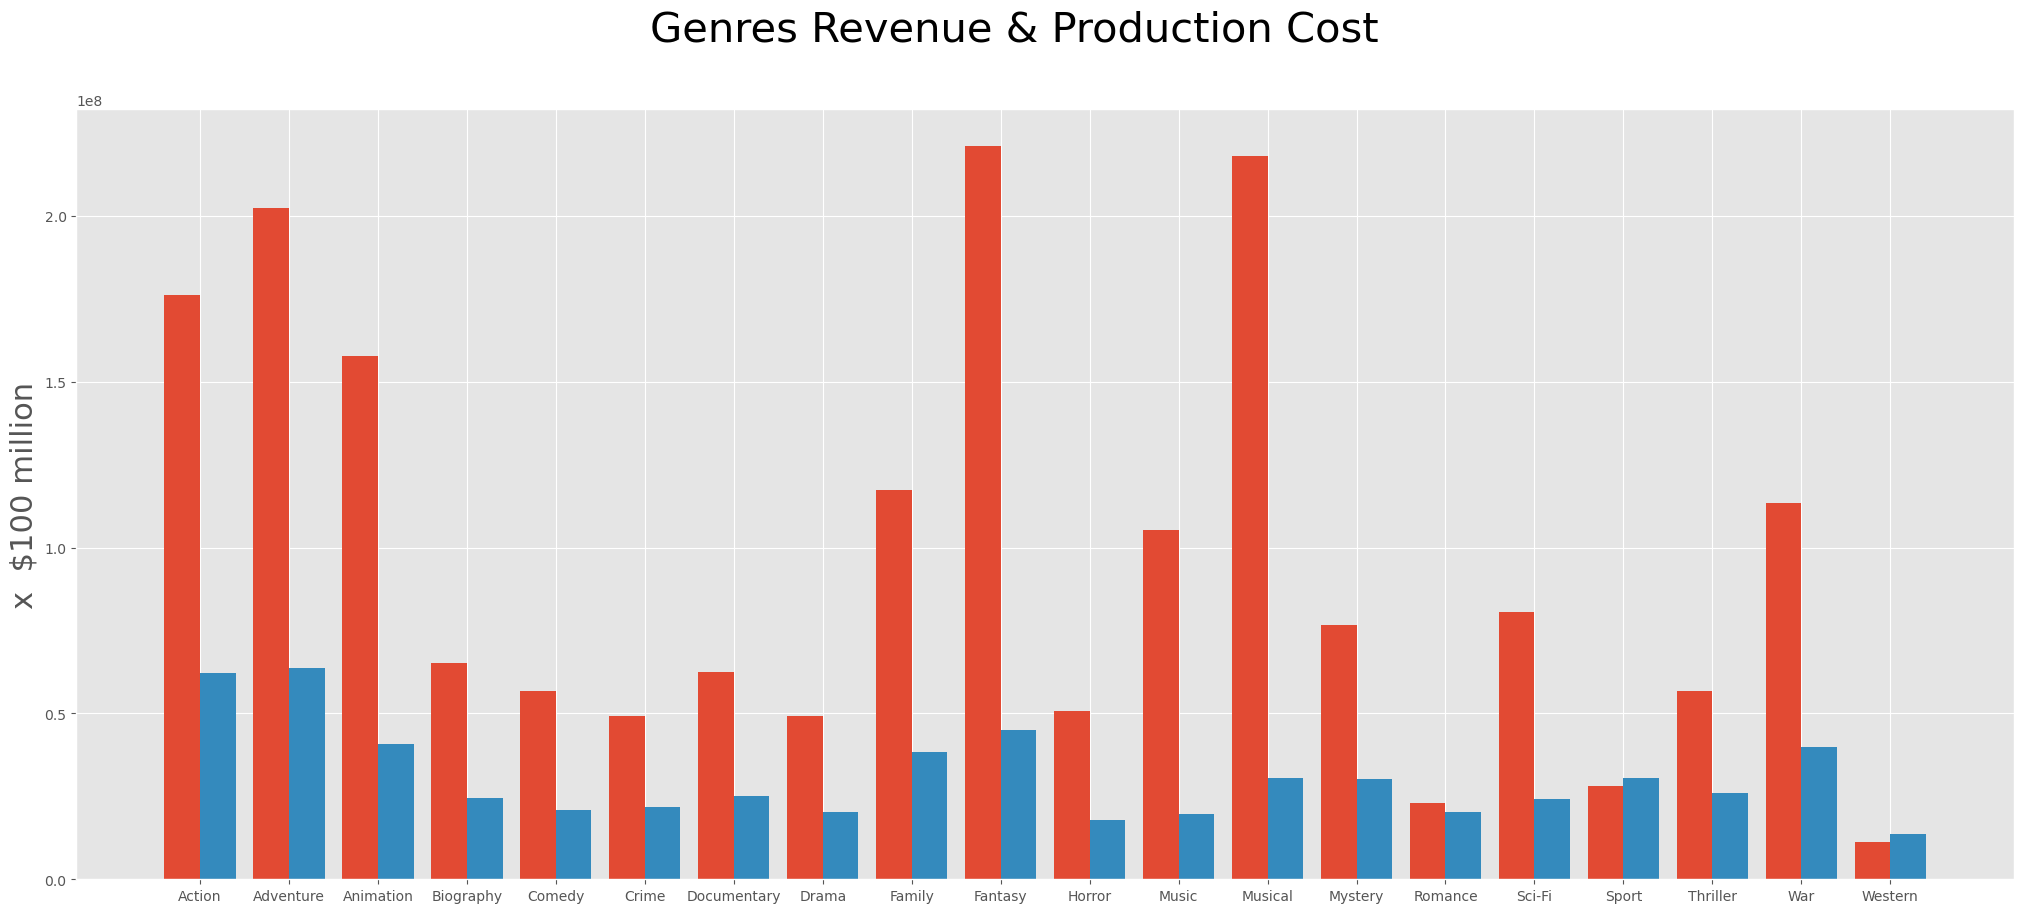

In [13]:
#compare the genres gross vs production value
w = 0.4
x=df_genres_mean['production_budget']
xx=df_genres_mean['worldwide_gross']
y=df_genres_mean['genres']

plt.figure(figsize=(25,10))


bar1 = np.arange(len(y))
bar2 = [i+w for i in bar1]

plt.bar(bar1, xx, w, label='worldwide_gross')
plt.bar(bar2, x, w, label='production_budget')

plt.xticks(bar1+w/2, y)

plt.suptitle("Genres Revenue & Production Cost", fontsize=30)
plt.ylabel('x  $100 million', fontsize=22)

# Output the final plot
plt.show();

<font color=blue>It will be easier to read by just viewing the profit of each genres </font>

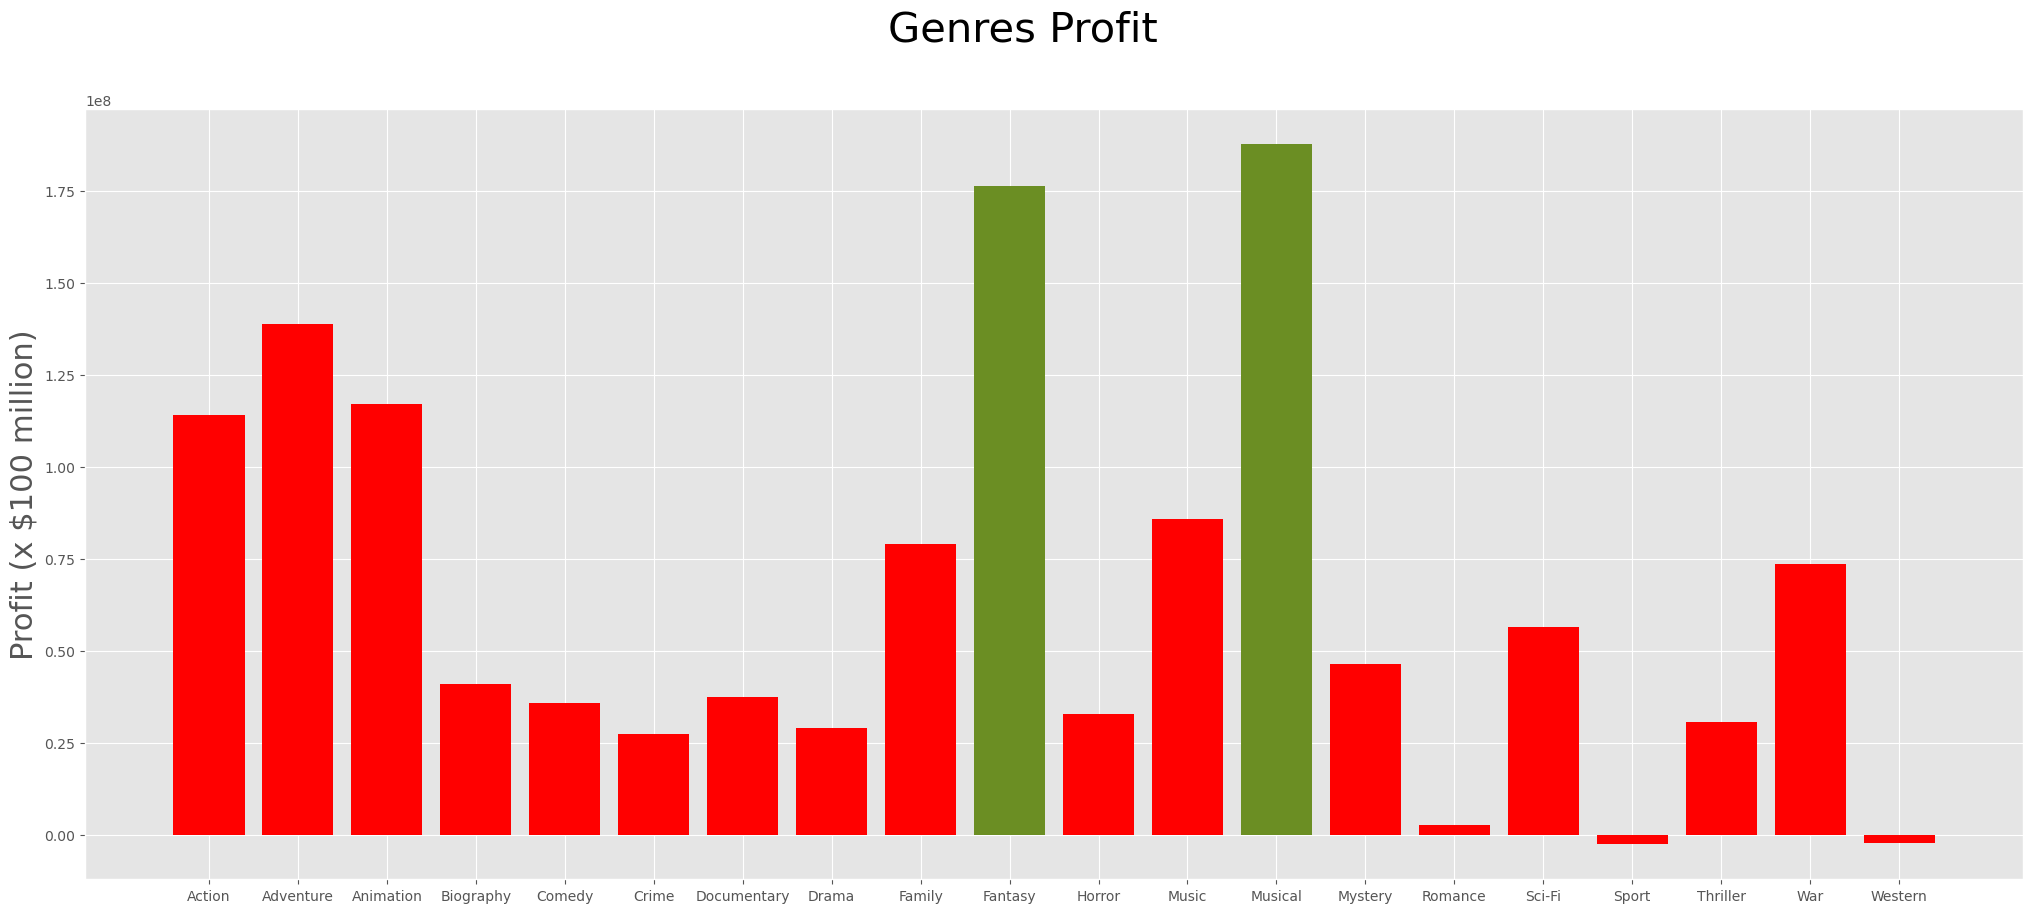

In [14]:
#But if we just look at the profits, we can get a better understanding of which genres are the most profitable
x=df_genres_mean['profit']
y=df_genres_mean['genres']

plt.figure(figsize=(25,10))

plt.bar(y,x,label='worldwide_gross', color=['red', 'red', 'red', 'red', 'red','red', 'red', 'red', 'red','olivedrab', 'red', 'red','olivedrab', 'red', 'red', 'red', 'red','red'])
plt.suptitle("Genres Profit", fontsize=30)
plt.ylabel('Profit (x $100 million)', fontsize=22)

plt.show();

## #2 Analyzing Runtime
In order to determain the ideal runtime for a film, I had to group by runtime means, then create a new column called 'profits' so I could anaylise the results.

<font color=blue>Grouping the data frame by runtimes and changing the results to the average </font>

In [15]:
#create a group by runtime average so I can compare runtime to gross revenue
df_runtime_mean = df_genres_and_runtime.groupby(by='runtime_minutes').mean()
df_runtime_mean = df_runtime_mean.reset_index()
df_runtime_mean.head(3)

,runtime_minutes,production_budget,worldwide_gross
0,1,250000.0,1.918620e+05
1,3,41500000.0,1.212149e+08
2,4,42520000.0,1.084137e+08


<font color=blue>Creating a new column called 'profits' by minusing the 'production_budget' from the 'worldwide_gross'  </font>

In [16]:
#create a new colum called 'profits' to analyse data more accuratly
df_runtime_mean['profit'] = df_runtime_mean['worldwide_gross'] - df_runtime_mean['production_budget']
df_runtime_mean.head(3)

,runtime_minutes,production_budget,worldwide_gross,profit
0,1,250000.0,1.918620e+05,-5.813800e+04
1,3,41500000.0,1.212149e+08,7.971487e+07
2,4,42520000.0,1.084137e+08,6.589375e+07


<font color=blue>Using a scatterplot to compare the runtime to profit </font>

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


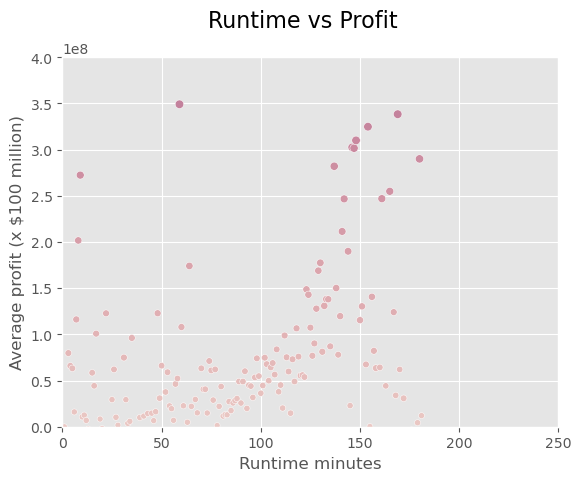

In [17]:
#creating a scatterplot to analyse results
x = df_runtime_mean['runtime_minutes']
y = df_runtime_mean['profit']

font = {'family' : 'normal',
        'size'   : 10}
plt.rc('font', **font)

sns.scatterplot(data=df_runtime_mean, x=x, y=y, hue=y, legend = False, size="worldwide_gross")

plt.suptitle("Runtime vs Profit", fontsize=16)
plt.ylabel('Average profit (x $100 million)', fontsize=12)
plt.xlabel('Runtime minutes', fontsize=12)


plt.xlim(0, 250)
plt.ylim(0, 400000000)

plt.show()

<font color=blue>Creating a histogram to back up the resutls </font>

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


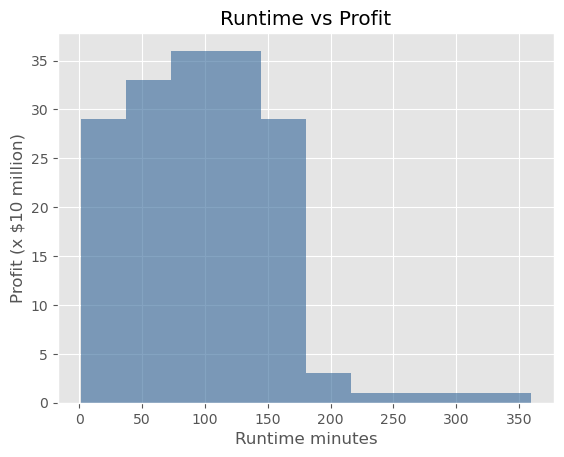

In [18]:
#create histogram to read data
x = df_runtime_mean['runtime_minutes']
y = df_runtime_mean['profit']
font = {'family' : 'normal',
        'size'   : 10}
plt.rc('font', **font)
fig, ax = plt.subplots()
ax.hist(x, bins=10, color=(0.2, 0.4, 0.6, 0.6,))
ax.set_xlabel("Runtime minutes")
ax.set_ylabel("Profit (x $10 million)")
ax.set_title("Runtime vs Profit");

## #3 Analyzing Months
In order to determain the most profitable months, I had to group the data by months and then find the mean profit for each month. See the restuls below.

<font color=blue>Grouping the data by months and changing the values to the average. Then putting them in accending order. </font>

In [19]:
#create a groub by months with average values
df_months = df_months.groupby(by='release_month').mean()
df_months = df_months.reset_index()

#create an average profit column
df_months['profit'] = df_months['worldwide_gross'] - df_months['production_budget']

#change the months to be in order
df_months = df_months.reindex([4, 3, 7, 0, 8, 6, 5, 1, 11, 10, 9, 2])
df_months

,release_month,popularity,production_budget,worldwide_gross,profit
4,jan,7.792706,2.841228e+07,8.184942e+07,5.343714e+07
3,feb,10.586549,3.441897e+07,1.098130e+08,7.539402e+07
7,mar,9.549521,3.827810e+07,1.058453e+08,6.756715e+07
0,apr,8.452900,2.619019e+07,8.709415e+07,6.090396e+07
8,may,12.030224,5.605888e+07,1.755680e+08,1.195092e+08
6,jun,10.137529,4.686212e+07,1.788816e+08,1.320195e+08
5,jul,12.003354,5.059177e+07,1.793851e+08,1.287934e+08
1,aug,9.824611,3.132332e+07,8.439077e+07,5.306745e+07
11,sep,9.404124,2.738404e+07,7.409241e+07,4.670838e+07
10,oct,9.876235,2.307376e+07,6.301750e+07,3.994374e+07


<font color=blue>Creating a graph to see the results </font>

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


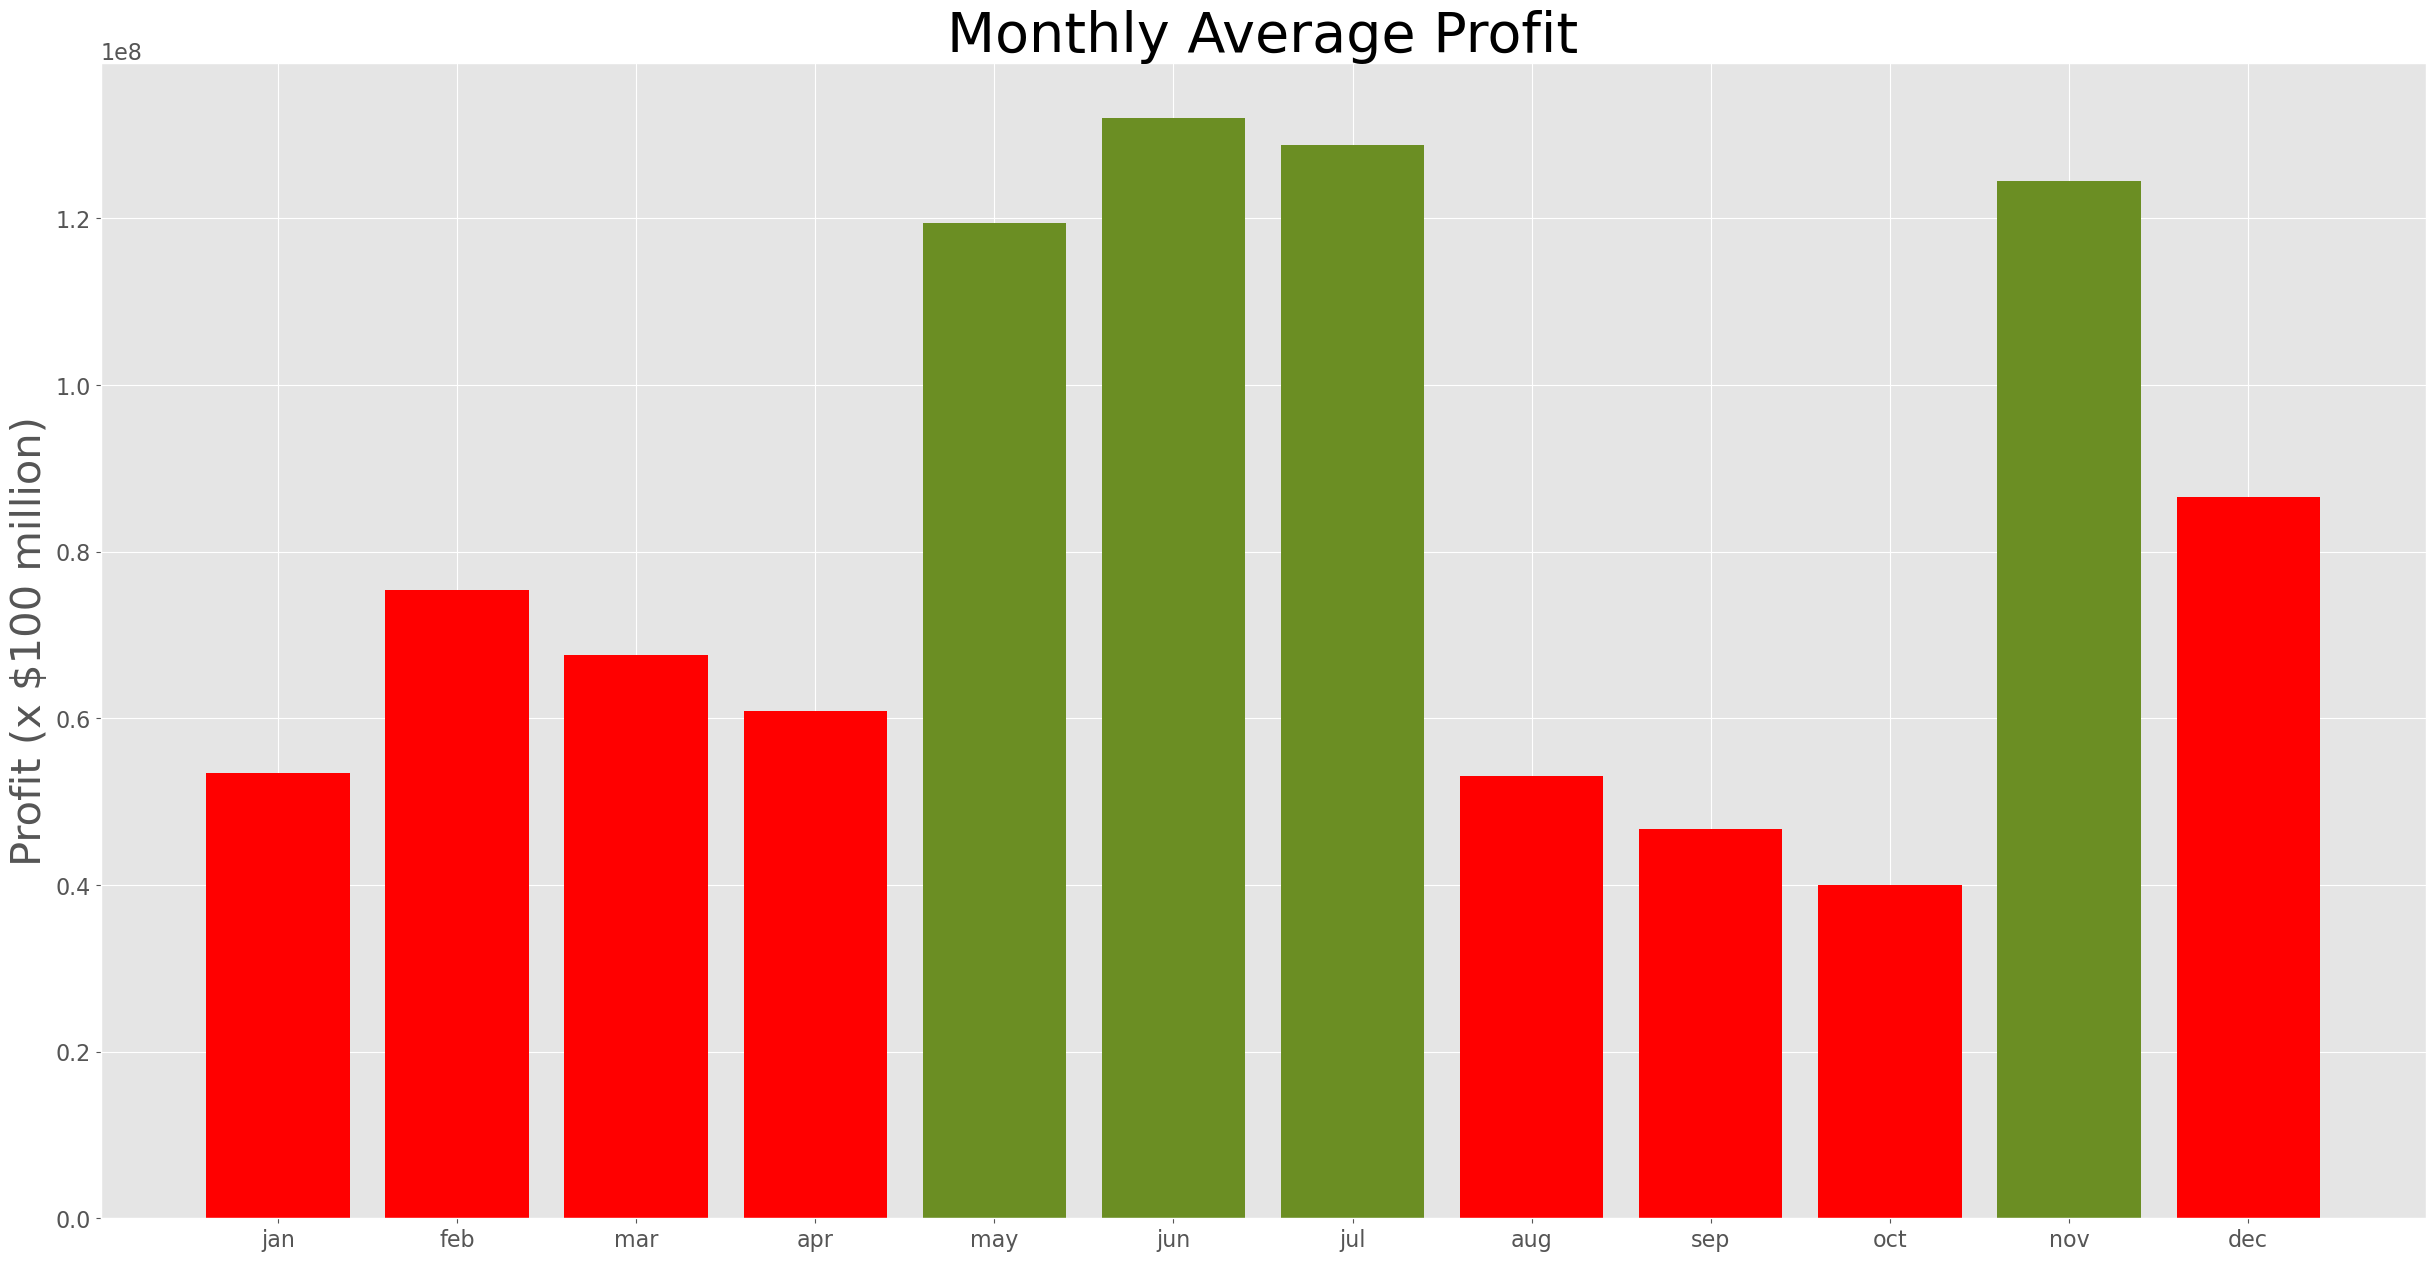

In [20]:
#show findings in a bar graph
plt.figure(figsize=(30,15))

x=df_months['release_month']
y=df_months['profit']

font = {'family' : 'normal',
        'size'   : 16}
plt.rc('font', **font)

plt.bar(x, y, color=['red', 'red', 'red', 'red', 'olivedrab','olivedrab', 'olivedrab', 'red', 'red','red', 'olivedrab', 'red'])

plt.ylabel('Profit (x $100 million)', fontsize=30)

plt.title('Monthly Average Profit', fontsize=40)

plt.show();


<font color=blue>Compare the results to the 3 most popular holiday in the US </font>

In [21]:
#create a new row that is the average for Summer Break months
x = (1.195092e+08 + 1.320195e+08 + 1.287934e+08) / 3
Summer_break = pd.DataFrame({'release_month':'summer break', 'popularity':0, 'production_budget':0, 'worldwide_gross':0, 'profit':x }, index=[0])
df_months = df_months.reset_index()
df_months.drop('index', inplace=True, axis=1)
df_months = df_months.append(Summer_break)

#create a new row that is the average for the Thanks Giving month
df_months.iloc[10, 0] = 'thanks giving Holiday'

#create a new row that is the average for the Christmas month
df_months.iloc[11, 0] = 'Christmas Holiday'

#drop the doubles
#df_months.drop('may', inplace=True, axis=1)
df_months.drop([4, 5, 6], axis=0, inplace=True)

#put back in order
df_months = df_months.reset_index()
df_months.drop('index', inplace=True, axis=1)
df_months = df_months.reindex([0, 1, 2, 3, 9, 4, 5, 6, 7, 8])
df_months



C:\Users\warre\AppData\Local\Temp\ipykernel_20632\3108821043.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_months = df_months.append(Summer_break)


,release_month,popularity,production_budget,worldwide_gross,profit
0,jan,7.792706,2.841228e+07,8.184942e+07,5.343714e+07
1,feb,10.586549,3.441897e+07,1.098130e+08,7.539402e+07
2,mar,9.549521,3.827810e+07,1.058453e+08,6.756715e+07
3,apr,8.452900,2.619019e+07,8.709415e+07,6.090396e+07
9,summer break,0.000000,0.000000e+00,0.000000e+00,1.267740e+08
4,aug,9.824611,3.132332e+07,8.439077e+07,5.306745e+07
5,sep,9.404124,2.738404e+07,7.409241e+07,4.670838e+07
6,oct,9.876235,2.307376e+07,6.301750e+07,3.994374e+07
7,thanks giving Holiday,13.116165,5.189578e+07,1.764026e+08,1.245069e+08
8,Christmas Holiday,12.452665,4.659090e+07,1.331329e+08,8.654202e+07


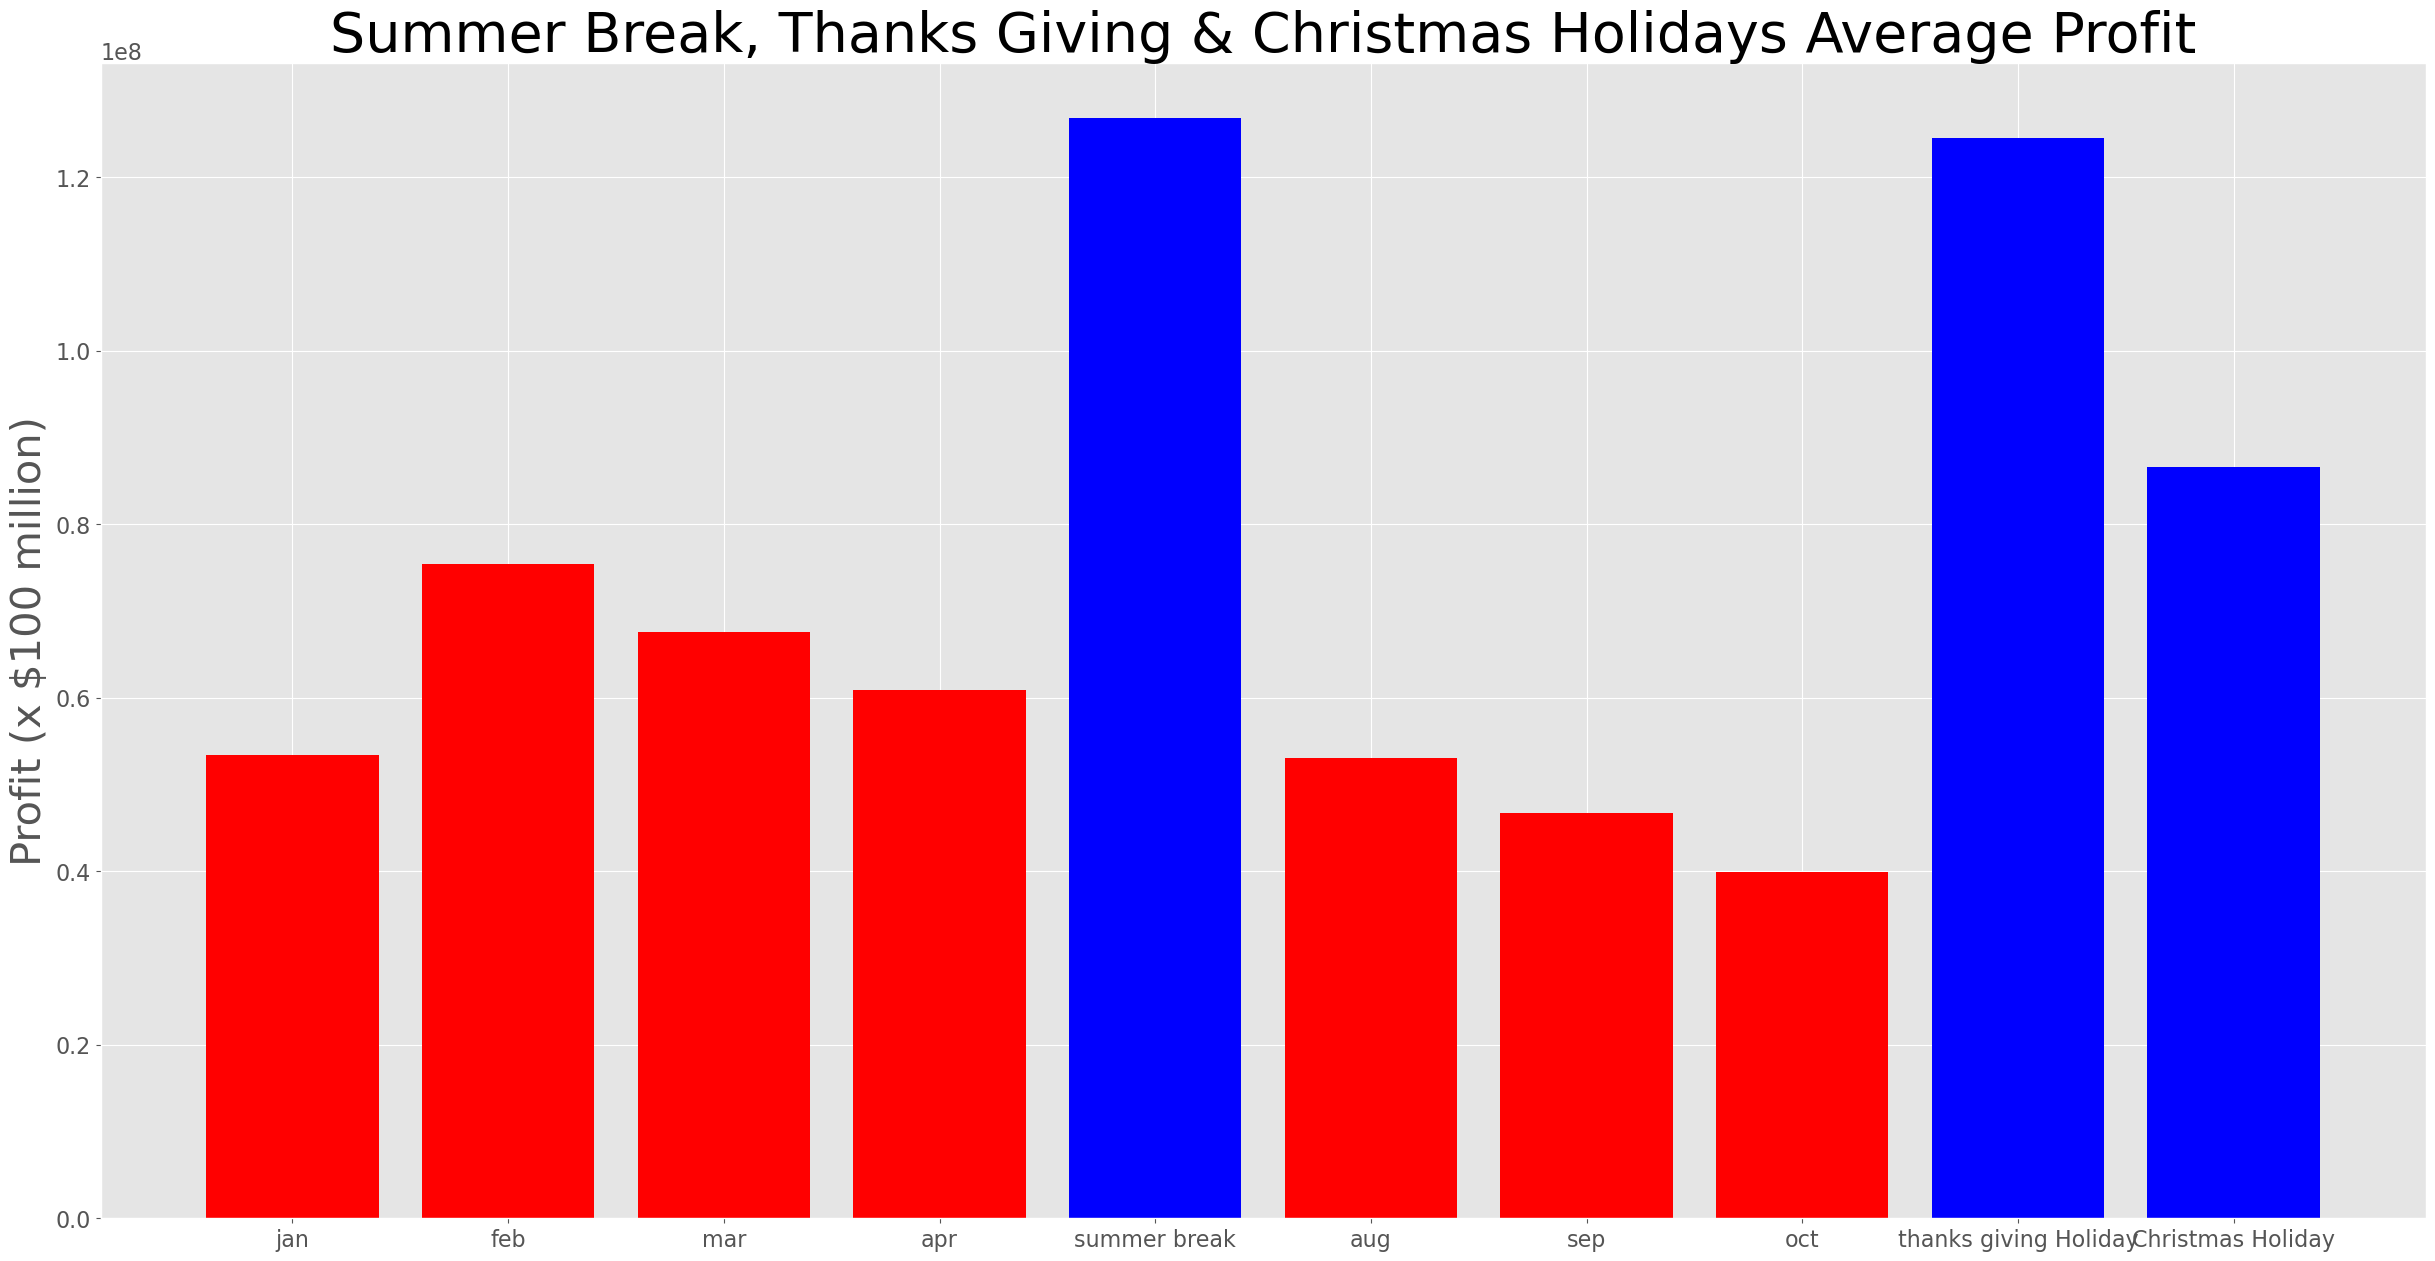

In [22]:
#show findings in a bar graph
plt.figure(figsize=(30,15))

x=df_months['release_month']
y=df_months['profit']

plt.bar(x, y, color=['red', 'red', 'red', 'red', 'blue','red', 'red', 'red', 'blue','blue'])

plt.ylabel('Profit (x $100 million)', fontsize=30)

plt.title('Summer Break, Thanks Giving & Christmas Holidays Average Profit', fontsize=40)

plt.show();

## #4 Analyzing Production Cost
In order to determain the most profitable months, I had to group the data by months and then find the mean profit for each month. See the restuls below.

<font color=blue>Grouping the dataframe by production budget and showing average results</font>

In [23]:
#Create a data frame grouped by production value average 
df4_budget_mean = df4.groupby('production_budget').mean()
df4_budget_mean = df4_budget_mean.reset_index()
df4_budget_mean['profit'] = df4_budget_mean['worldwide_gross'] - df4_budget_mean['production_budget']
df4_budget_mean.head(3)

,production_budget,worldwide_gross,profit
0,1100,181041.0,179941.0
1,1400,0.0,-1400.0
2,5000,1338.0,-3662.0


<font color=blue>Creating a scatterplot to compare the production budget with revenue</font>

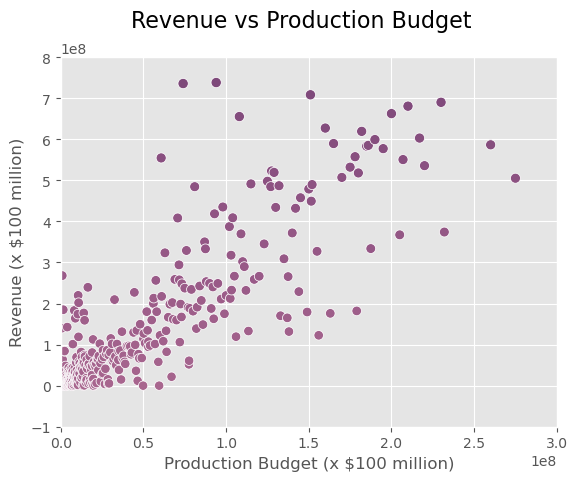

In [24]:
#create histogram to read data
x=df4_budget_mean['production_budget']
y=df4_budget_mean['worldwide_gross']

font = {'family' : 'normal',
        'size'   : 10}
plt.rc('font', **font)

sns.scatterplot(data = df4_budget_mean, x = "production_budget", y =  "worldwide_gross", hue="worldwide_gross", legend = False, size="worldwide_gross")
#sns.lineplot(data = df4_budget_mean, x = "production_budget", y =  "worldwide_gross")

plt.suptitle("Revenue vs Production Budget", fontsize=16)
plt.ylabel('Revenue (x $100 million)', fontsize=12)
plt.xlabel('Production Budget (x $100 million)', fontsize=12)


plt.xlim(0, 300000000)
plt.ylim(-100000000, 800000000)

plt.show()

***

# Conclusion
My above analysis leads me to 4 clear reccommendations that I can confidenly provide to help produce the most profitable film

### #1 Genres
Based on the bar chart above, you can clearly see that musical and Fantasy are the genres that produce the highest profit, followed by action, adventure and animation.

### #2 Runtime
Based on the histogram and scatterplot above, you can see the the most profitable runtime is between 100 - 140 minutes.

### #3 Release Month
Based on the bar chart above, the months that generate the most profit are May to July and November. This seems to be directly related to the US holidays.

### #4 Production Budget
Based on the scatterplot above, you can see a strong corrolation between higher prouction budget and higher revenue, simply meaning, the higher your production budget, the more revenue the film will produce.

***